# Movies Recommendation System

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from google.colab import drive
from ast import literal_eval

In [2]:
drive.mount('/content/drive/')
path='drive/MyDrive/'

Mounted at /content/drive/


## 1. Exploratory data analysis

In [73]:
movies_df=pd.read_csv(path+'tmdb_5000_movies.csv')
credits_df=pd.read_csv(path+'tmdb_5000_credits.csv')

In [74]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [75]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [76]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [77]:
movies_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

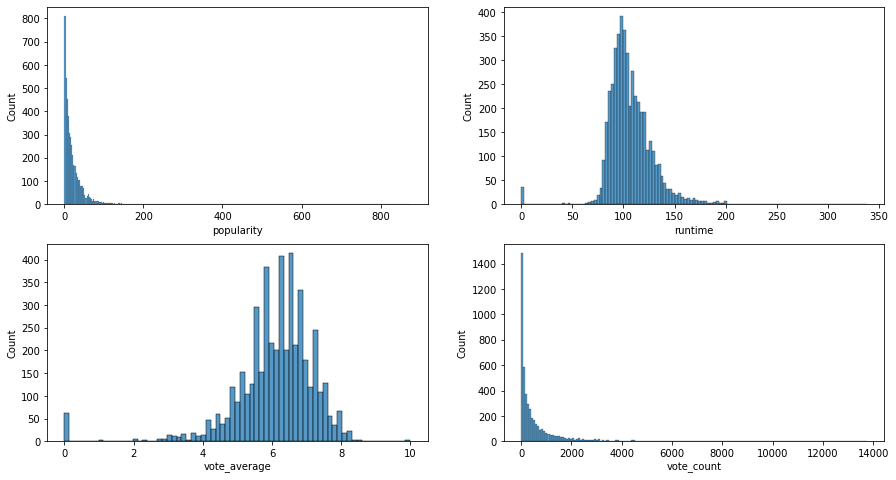

In [78]:
# visualize popularity, runtime, vote_average, vote_count

fig, ax = plt.subplots(2, 2, figsize=(15, 8))

sns.histplot(movies_df.popularity, ax=ax[0][0])
sns.histplot(movies_df.runtime, ax=ax[0][1])
sns.histplot(movies_df.vote_average, ax=ax[1][0])
sns.histplot(movies_df.vote_count, ax=ax[1][1])

In [79]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [80]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [81]:
credits_df.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


In [82]:
credits_df.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [83]:
# rename the movie_id to marge it with the other dataset
credits_df.rename(columns={'movie_id': 'id'},inplace=True)

In [84]:
credits_df.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [85]:
# select the necessary columns
movies_data = movies_df[['id','genres', 'overview','keywords','production_companies']]
movies_data.head()

,id,genres,overview,keywords,production_companies
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam..."
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""..."
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


In [86]:
# merge both datasets
movies_data = movies_data.merge(credits_df, on="id")
movies_data.head()

,id,genres,overview,keywords,production_companies,title,cast,crew
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",A cryptic message from Bond’s past sends him o...,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Following the death of District Attorney Harve...,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","John Carter is a war-weary, former military ca...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [87]:
# drop the id column
movies_data.drop(columns='id', inplace=True)

In [88]:
movies_data.columns

Index(['genres', 'overview', 'keywords', 'production_companies', 'title',
       'cast', 'crew'],
      dtype='object')

In [89]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   genres                4803 non-null   object
 1   overview              4800 non-null   object
 2   keywords              4803 non-null   object
 3   production_companies  4803 non-null   object
 4   title                 4803 non-null   object
 5   cast                  4803 non-null   object
 6   crew                  4803 non-null   object
dtypes: object(7)
memory usage: 300.2+ KB


In [90]:
movies_data.isnull().sum()

genres                  0
overview                3
keywords                0
production_companies    0
title                   0
cast                    0
crew                    0
dtype: int64

## 2. Preprocessing

In [91]:
dict_columns = ['genres', 'keywords', 'production_companies', 'cast', 'crew']
for column in dict_columns:
  movies_data[column] = movies_data[column].apply(literal_eval)


In [92]:
copy_movies_data = movies_data.copy()

In [93]:
# extract the name of each company
def production_companies(companies):
    for details in companies:
        return details["name"]
    

In [94]:
copy_movies_data['production_companies'] = movies_data['production_companies'].apply(production_companies)

In [95]:
# extract the name of each genres, keywords and cast columns

def get_info(column):
    items = 3
    details_list = []
    while items > 0:
        details_list = [details["name"] for details in column]
        items = items-1
    return details_list

In [96]:
# extract the name of directors
def director(crew):
    for details in crew :
        if details['job'] == "Director":
            return details["name"]
    return np.nan

In [97]:
copy_movies_data['director'] = movies_data['crew'].apply(director)

In [98]:
copy_movies_data['title'] = movies_data['title'].apply(lambda row: row.lower())

In [99]:
cols = ['genres', 'keywords', 'cast']
for col in cols:
    copy_movies_data[col] = movies_data[col].apply(get_info)

In [100]:
# dropping rows with empty lists 
for col in cols:
  copy_movies_data=copy_movies_data[copy_movies_data[col].map(lambda d: len(d)) > 0] 
  

In [101]:
copy_movies_data

,genres,overview,keywords,production_companies,title,cast,crew,director
0,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...",Ingenious Film Partners,avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...",Walt Disney Pictures,pirates of the caribbean: at world's end,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski
2,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...",Columbia Pictures,spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes
3,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...",Legendary Pictures,the dark knight rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christopher Nolan
4,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...",Walt Disney Pictures,john carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Andrew Stanton
...,...,...,...,...,...,...,...,...
4795,[Drama],A young woman in L.A. is having a bad day: she...,"[gang, audition, police fake, homeless, actress]",Asylum Films,bang,"[Darling Narita, Peter Greene, Michael Newland...","[{'credit_id': '52fe4ab0c3a368484e161add', 'de...",Ash Baron-Cohen
4796,"[Science Fiction, Drama, Thriller]",Friends/fledgling entrepreneurs invent a devic...,"[distrust, garage, identity crisis, time trave...",Thinkfilm,primer,"[Shane Carruth, David Sullivan, Casey Gooden, ...","[{'credit_id': '52fe45e79251416c75066791', 'de...",Shane Carruth
4798,"[Action, Crime, Thriller]",El Mariachi just wants to play his guitar and ...,"[united states–mexico barrier, legs, arms, pap...",Columbia Pictures,el mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",Robert Rodriguez
4800,"[Comedy, Drama, Romance, TV Movie]","""Signed, Sealed, Delivered"" introduces a dedic...","[date, love at first sight, narration, investi...",Front Street Pictures,"signed, sealed, delivered","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...",Scott Smith


In [102]:
# count how many of directors appear

movies_df_2 = pd.DataFrame(copy_movies_data['director'].value_counts(), columns=['director', 'counts'])
movies_df_2['counts'] = movies_df_2['director']
movies_df_2['director'] = movies_df_2.index
movies_df_2

,director,counts
Steven Spielberg,Steven Spielberg,27
Woody Allen,Woody Allen,20
Martin Scorsese,Martin Scorsese,20
Clint Eastwood,Clint Eastwood,19
Ridley Scott,Ridley Scott,16
...,...,...
R.J. Cutler,R.J. Cutler,1
Dan Mazer,Dan Mazer,1
Mabel Cheung,Mabel Cheung,1
Jamie Thraves,Jamie Thraves,1


Text(0.5, 1.0, 'Top 50 director')

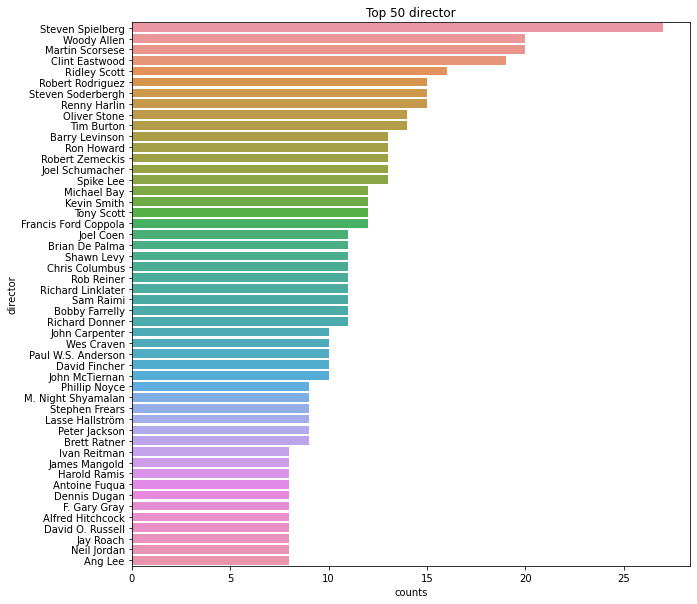

In [103]:
# visualize the top 50 director

plt.subplots(figsize=(10, 10))
sns.barplot(x='counts', y='director', data=movies_df_2.head(50))
plt.title('Top 50 director')

In [104]:
copy_movies_data.dropna(inplace=True)

In [105]:
# create document of all string values in each column 
def create_doc(df):
    return ' '.join(df.genres)+' '+' '.join(df.keywords)+' '+ df.production_companies
    +' '+df.tagline+' '+' '.join(df.cast)+' '+ df.director + ' ' + df.overview

In [106]:
copy_movies_data['document'] = copy_movies_data.apply(create_doc, axis=1)

In [107]:
copy_movies_data

,genres,overview,keywords,production_companies,title,cast,crew,director,document
0,"[Action, Adventure, Fantasy, Science Fiction]","In the 22nd century, a paraplegic Marine is di...","[culture clash, future, space war, space colon...",Ingenious Film Partners,avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,"[Adventure, Fantasy, Action]","Captain Barbossa, long believed to be dead, ha...","[ocean, drug abuse, exotic island, east india ...",Walt Disney Pictures,pirates of the caribbean: at world's end,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...
2,"[Action, Adventure, Crime]",A cryptic message from Bond’s past sends him o...,"[spy, based on novel, secret agent, sequel, mi...",Columbia Pictures,spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes,Action Adventure Crime spy based on novel secr...
3,"[Action, Crime, Drama, Thriller]",Following the death of District Attorney Harve...,"[dc comics, crime fighter, terrorist, secret i...",Legendary Pictures,the dark knight rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christopher Nolan,Action Crime Drama Thriller dc comics crime fi...
4,"[Action, Adventure, Science Fiction]","John Carter is a war-weary, former military ca...","[based on novel, mars, medallion, space travel...",Walt Disney Pictures,john carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Andrew Stanton,Action Adventure Science Fiction based on nove...
...,...,...,...,...,...,...,...,...,...
4795,[Drama],A young woman in L.A. is having a bad day: she...,"[gang, audition, police fake, homeless, actress]",Asylum Films,bang,"[Darling Narita, Peter Greene, Michael Newland...","[{'credit_id': '52fe4ab0c3a368484e161add', 'de...",Ash Baron-Cohen,Drama gang audition police fake homeless actre...
4796,"[Science Fiction, Drama, Thriller]",Friends/fledgling entrepreneurs invent a devic...,"[distrust, garage, identity crisis, time trave...",Thinkfilm,primer,"[Shane Carruth, David Sullivan, Casey Gooden, ...","[{'credit_id': '52fe45e79251416c75066791', 'de...",Shane Carruth,Science Fiction Drama Thriller distrust garage...
4798,"[Action, Crime, Thriller]",El Mariachi just wants to play his guitar and ...,"[united states–mexico barrier, legs, arms, pap...",Columbia Pictures,el mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",Robert Rodriguez,Action Crime Thriller united states–mexico bar...
4800,"[Comedy, Drama, Romance, TV Movie]","""Signed, Sealed, Delivered"" introduces a dedic...","[date, love at first sight, narration, investi...",Front Street Pictures,"signed, sealed, delivered","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...","[{'credit_id': '52fe4df3c3a36847f8275ecf', 'de...",Scott Smith,Comedy Drama Romance TV Movie date love at fir...


## 3. Evaluation

### Consine Similarity and make recommendations

- Formula:   
            Cos(x, y) = x . y / ||x|| * ||y||
            
            - x . y = product (dot) of the vectors ‘x’ and ‘y’.
            - ||x|| and ||y|| = length of the two vectors ‘x’ and ‘y’.
            - ||x|| * ||y|| = cross product of the two vectors ‘x’ and ‘y’.

In [108]:
vectorizer = CountVectorizer(stop_words='english')
count_matrix = vectorizer.fit_transform(copy_movies_data['document'])

In [109]:
cos_similarity = cosine_similarity(count_matrix, count_matrix)

In [110]:
cos_similarity

array([[1.        , 0.10107974, 0.06243905, ..., 0.03513642, 0.07027284,
        0.        ],
       [0.10107974, 1.        , 0.1278043 , ..., 0.09589266, 0.09589266,
        0.        ],
       [0.06243905, 0.1278043 , 1.        , ..., 0.29617444, 0.05923489,
        0.        ],
       ...,
       [0.03513642, 0.09589266, 0.29617444, ..., 1.        , 0.06666667,
        0.        ],
       [0.07027284, 0.09589266, 0.05923489, ..., 0.06666667, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [111]:
copy_movies_data = copy_movies_data.reset_index()

In [112]:
indexs = pd.Series(copy_movies_data.index, copy_movies_data['title'])

In [125]:
indexs

title
avatar                                         0
pirates of the caribbean: at world's end       1
spectre                                        2
the dark knight rises                          3
john carter                                    4
                                            ... 
bang                                        4175
primer                                      4176
el mariachi                                 4177
signed, sealed, delivered                   4178
my date with drew                           4179
Length: 4180, dtype: int64

In [121]:
'''
 A function that take the movie title and the similarity scores,
 then compare user's movie with the other movies to select the most similar movies
 and return the top 10 of similar movies and there similarity scores 
'''

def get_recommendation(title,cos_sim=cos_similarity):
    idx=indexs[title]
    similarity_scores = list(enumerate(cos_sim[idx]))

    # sort the scores descending
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # select the top 10 scores
    similarity_scores = similarity_scores[1:11]

    # extract these scores' indices
    movies_idx = [ind[0] for ind in similarity_scores]

    # extract the movie's title depend on movie's index
    movies = movies_data['title'].iloc[movies_idx]
    
    return movies, similarity_scores
    

In [114]:
'''
    A function that take a tuple of index and similarity_scores of the movies,
    and return the similarity_scores only
'''
def Extract_Similarity_Scores(similarity_scores):
  score_list = []

  for score in similarity_scores:
    score_list.append(score[1])
  
  return score_list

In [122]:
# make recommendations

try:
  movie, scores = get_recommendation("The lion king".lower(), cos_similarity)
  Similarity_Scores = Extract_Similarity_Scores(scores)

  movie_data_frame = pd.DataFrame(movie)
  movie_data_frame['similarity_scores'] = Similarity_Scores

  print(movie_data_frame)
except Exception as e:
  print("Please make sure it is before 2016")

[1854, 2048, 57, 253, 76, 460, 1586, 3985, 1357, 1818]
                                        title  similarity_scores
1854                              Money Talks           0.495074
2048                             Darling Lili           0.460179
57                                     WALL·E           0.458349
253                    300: Rise of an Empire           0.428746
76                G.I. Joe: The Rise of Cobra           0.404577
460                                 Zookeeper           0.404226
1586                         A View to a Kill           0.404226
3985  Friday the 13th Part VII: The New Blood           0.403604
1357                                 Ip Man 3           0.383482
1818                         Schindler's List           0.366679
